In [1]:
import sys
sys.executable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

/var/folders/yq/jk04s8595t15xj70821c1fbh0000gn/T/ipykernel_34839/2945454219.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# importing the dataset
data = pd.read_csv('/Users/himanshutalele/Desktop/Self/Bank_Campaign_Data/Bank_Marketing.csv', delimiter=';')
display(data)
#unique_jobs = data['education'].unique()
#print(unique_jobs)


age           job   marital  education default  balance housing loan   
0      58.0    management   married   tertiary      no     2143     yes   no  \
1      44.0    technician    single  secondary      no       29     yes   no   
2      33.0  entrepreneur   married  secondary      no        2     yes  yes   
3      47.0   blue-collar   married    unknown      no     1506     yes   no   
4      33.0       unknown    single    unknown      no        1      no   no   
...     ...           ...       ...        ...     ...      ...     ...  ...   
45206  51.0    technician   married   tertiary      no      825      no   no   
45207  71.0       retired  divorced    primary      no     1729      no   no   
45208  72.0       retired   married  secondary      no     5715      no   no   
45209  57.0   blue-collar   married  secondary      no      668      no   no   
45210  37.0  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [3]:
df = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45186 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45167 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


### Step 1: Descriptive Statistics

Now we will ompute basic summary statistics for numerical variables, such as mean, median, and standard deviation and will examine the distribution of age and balance to understand the data.

Summary Statistics for Numerical Columns:
                age        balance
count  45186.000000   45211.000000
mean      40.934714    1362.272058
std       10.617593    3044.765829
min       18.000000   -8019.000000
25%       33.000000      72.000000
50%       39.000000     448.000000
75%       48.000000    1428.000000
max       95.000000  102127.000000

Summary Statistics for 'job' Column:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

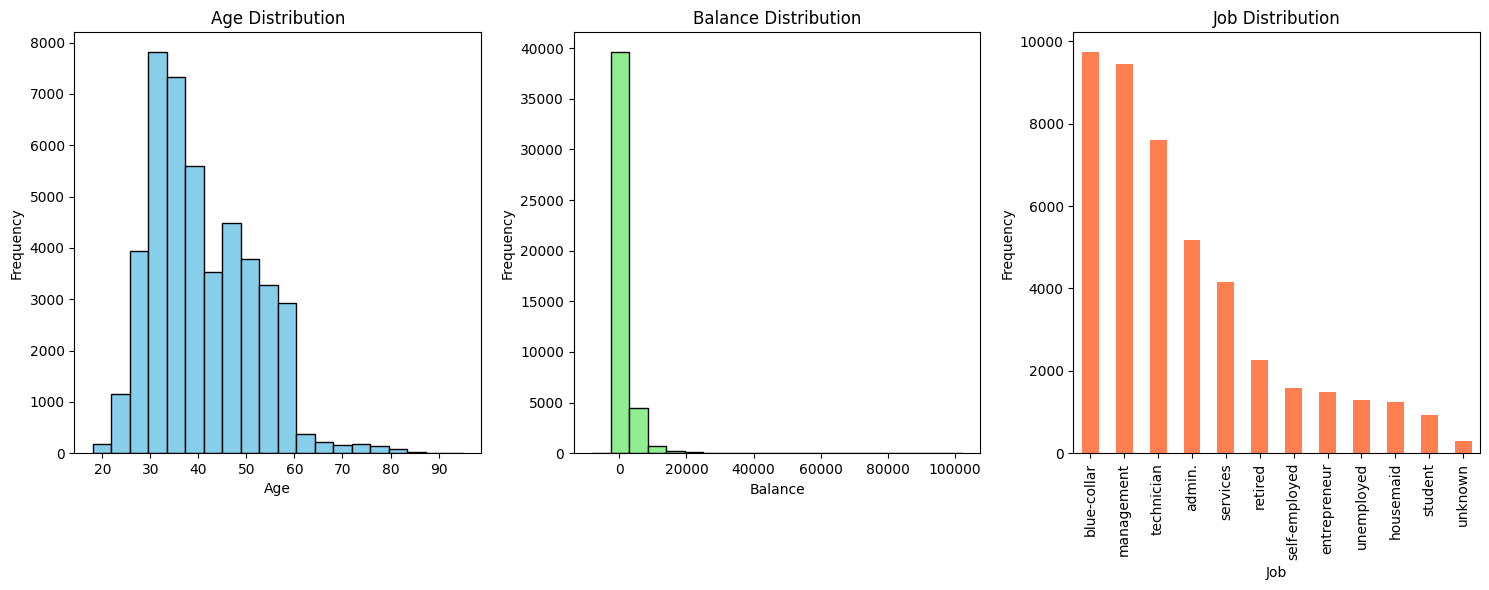

In [4]:
#Compute basic summary statistics
numerical_columns = ['age', 'balance']
categorical_columns = ['job']

# summary statistics for numerical columns
summary_statistics = df[numerical_columns].describe()

# summary statistics for the job column
job_summary = df['job'].value_counts()

# Print the summary statistics
print("Summary Statistics for Numerical Columns:")
print(summary_statistics)
print("\nSummary Statistics for 'job' Column:")
print(job_summary)

# Visualize data distribution
plt.figure(figsize=(15, 6))

# Histogram for age
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for balance
plt.subplot(1, 3, 2)
plt.hist(df['balance'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# Bar chart for 'job' column
plt.subplot(1, 3, 3)
job_summary.plot(kind='bar', color='coral')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Basic Summary Statistics

- **Age**: The age of clients in the dataset ranges from 18 to 95, with an average age of approximately 41 years. The majority of clients fall between the ages of 33 and 48, reflecting a relatively broad age distribution.
 
- **Balance**: The balance variable represents the account balance of clients, with a significant standard deviation indicating considerable variation. While the average balance is approximately 1362 units, the minimum and maximum account balances are -8019 and 102127 units, respectively.
 
- **Job**: The 'job' column categorizes clients into various job types. The most common job categories include 'blue-collar,' 'management,' and 'technician,' with 'blue-collar' being the largest group. There are also 'unknown' job categories in the dataset.


### Step 2: Data Cleaning:

Here we will handle missing data by imputing or removing missing values, and will address any outliers that may affect the analysis.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45186 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45167 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


While there are missing values in age and month column, and also it contains entries such as 'unknown' and 'others' in column like poutcome, job, education which are used for analytical purposes, are treated as ambiguous values. So for these ambiguous entries we will remove from the dataset to ensure data clarity and reliability for analysis.

### 1. Age 

In [6]:
#count the missing values in age column.
df.age.isnull().sum()

25

In [7]:
#pring the shape of dataframe inp0
df.shape

(45211, 17)

In [8]:
#calculate the percentage of missing values in age column.
float(100.0*20/45211)

0.04423702196368141

In [9]:
#drop the records with age missing in df and copy in new_df dataframe.
new_df = df[-df.age.isnull()].copy()
new_df

age           job   marital  education default  balance housing loan   
0      58.0    management   married   tertiary      no     2143     yes   no  \
1      44.0    technician    single  secondary      no       29     yes   no   
2      33.0  entrepreneur   married  secondary      no        2     yes  yes   
3      47.0   blue-collar   married    unknown      no     1506     yes   no   
4      33.0       unknown    single    unknown      no        1      no   no   
...     ...           ...       ...        ...     ...      ...     ...  ...   
45206  51.0    technician   married   tertiary      no      825      no   no   
45207  71.0       retired  divorced    primary      no     1729      no   no   
45208  72.0       retired   married  secondary      no     5715      no   no   
45209  57.0   blue-collar   married  secondary      no      668      no   no   
45210  37.0  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45186 rows x 17 columns]

Now as we have saved the results in new_df, hence forth we will perform new operation considering new_df

### 2. Month 

In [10]:
#count the missing values in month column in new_df.
new_df.month.isnull().sum()

44

In [11]:
#print the percentage of each month in the data frame new_df.
new_df.month.value_counts(normalize=True)

month
may    0.304484
jul    0.152430
aug    0.138230
jun    0.118138
nov    0.087856
apr    0.064884
feb    0.058637
jan    0.031035
oct    0.016282
sep    0.012760
mar    0.010522
dec    0.004741
Name: proportion, dtype: float64

In [12]:
#find the mode of month in new_df
month_mode = new_df.month.mode()[0]
month_mode

'may'

In [13]:
# fill the missing values with mode value of month in new_df.
new_df.month.fillna(month_mode, inplace=True)
new_df.month.value_counts(normalize=True)

month
may    0.305161
jul    0.152282
aug    0.138096
jun    0.118023
nov    0.087771
apr    0.064821
feb    0.058580
jan    0.031005
oct    0.016266
sep    0.012747
mar    0.010512
dec    0.004736
Name: proportion, dtype: float64

In [14]:
#let's see the null values in the month column.
new_df.month.isnull().sum()

0

### 3.  y
 first we will rename the y to response for better understanding

In [15]:
nw_df = new_df.copy()

# Rename the 'y' column to 'response'
nw_df = nw_df.rename(columns={'y': 'response'})

- So, we have removed missing values from column Age and Month. Also, in the next step missing values will be reevaluated. 

In [16]:
#calculate the missing values in each column of data frame: nw_df.
nw_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

- As we can see after importing the dataset, in pdays column there are -1 values, so we will replace those -1 with NaN

In [17]:
nw_df.pdays.describe()

count    45186.000000
mean        40.194419
std        100.127453
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [18]:
nw_df['pdays'] = nw_df['pdays'].mask(nw_df['pdays'] < 0, pd.NA)
nw_df.pdays.describe()

count    8251.000000
mean      224.598231
std       115.339416
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

- Last step : to remove the 'other' from poutcome, job, education 

In [19]:
# Here we will remove the rows which column 'poutcome' contains 'other'
nw_df = nw_df[nw_df['poutcome'] != 'other']

In [20]:
# Here we will copy the data in new data frame and will replace 'unknown' with 'other' in the 'job' and 'education' columns
new_df1 = nw_df.copy()

new_df1['job'] = new_df1['job'].replace('unknown', 'other')
new_df1['education'] = new_df1['education'].replace('unknown', 'other')

# New DF results
new_df1

age           job   marital  education default  balance housing loan   
0      58.0    management   married   tertiary      no     2143     yes   no  \
1      44.0    technician    single  secondary      no       29     yes   no   
2      33.0  entrepreneur   married  secondary      no        2     yes  yes   
3      47.0   blue-collar   married      other      no     1506     yes   no   
4      33.0         other    single      other      no        1      no   no   
...     ...           ...       ...        ...     ...      ...     ...  ...   
45205  25.0    technician    single  secondary      no      505      no  yes   
45206  51.0    technician   married   tertiary      no      825      no   no   
45207  71.0       retired  divorced    primary      no     1729      no   no   
45208  72.0       retired   married  secondary      no     5715      no   no   
45209  57.0   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome   
0        unknown    5   may       261         1    NaN         0  unknown  \
1        unknown    5   may       151         1    NaN         0  unknown   
2        unknown    5   may        76         1    NaN         0  unknown   
3        unknown    5   may        92         1    NaN         0  unknown   
4        unknown    5   may       198         1    NaN         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45205   cellular   17   nov       386         2    NaN         0  unknown   
45206   cellular   17   nov       977         3    NaN         0  unknown   
45207   cellular   17   nov       456         2    NaN         0  unknown   
45208   cellular   17   nov      1127         5  184.0         3  success   
45209  telephone   17   nov       508         4    NaN         0  unknown   

      response  
0           no  
1           no  
2           no  
3           no  
4           no  
...        ...  
45205      yes  
45206      yes  
45207      yes  
45208      yes  
45209       no  

[43347 rows x 17 columns]

In next step we will anaylse and drop the unwanted column, unit conversion for standardising the values

1. Will remove the contact column
2. will change unit conversion in duration column from seconds to min 
3. will change the month column from words to number.

In [21]:
# 1. will drop the conact column and will save in new dataframe i.e n_df1
n_df1 = new_df1.drop('contact', axis=1)

In [22]:
#2. Unit conversion in duration column from seconds to min 
n_df1['duration'] = n_df1['duration'].apply(lambda n:n/60).round(2)

In [23]:
# 3. Month column from words to number
# Here we will first create  a dictionary to map month names to their corresponding integers
mth  = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

n_df1["month"] = n_df1["month"].map(mth)

## Checking Outliers
 - As a next step of Data Cleaning we will check if there are any outliers.
 
# 1. Age

In [24]:
n_df1.age.describe()

count    43347.000000
mean        40.984636
std         10.594261
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

# Histogram

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

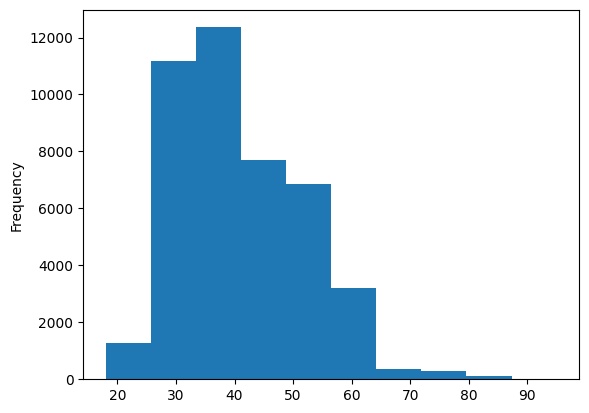

In [25]:
n_df1.age.plot.hist()
plt.show()

# Boxplot 

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

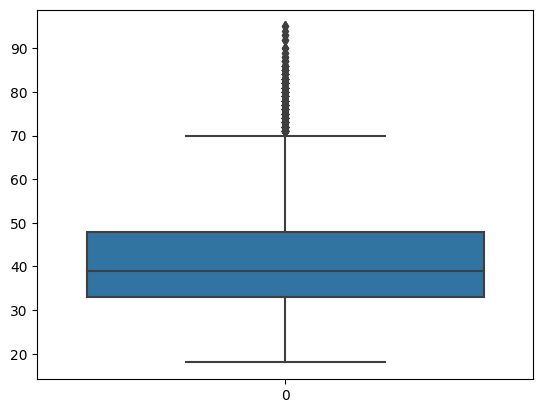

In [26]:
sns.boxplot(n_df1.age)
plt.show()

# 2. Balance

In [27]:
n_df1.balance.describe()

count     43347.000000
mean       1357.187764
std        3031.616536
min       -8019.000000
25%          70.000000
50%         443.000000
75%        1417.000000
max      102127.000000
Name: balance, dtype: float64

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

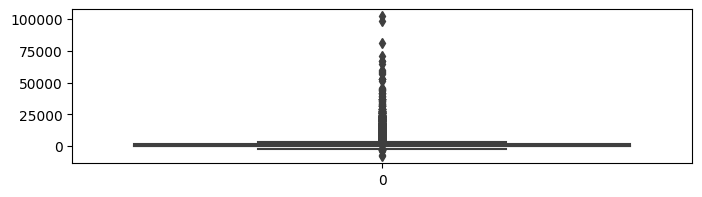

In [28]:
plt.figure(figsize=[8,2])
sns.boxplot(n_df1.balance)
plt.show()

Now we will use Quantiles to divide a dataset into equal parts, ehich will provide  us the insights into the distribution of data. 

In [29]:
n_df1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      443.00
0.70     1118.00
0.90     3570.00
0.95     5768.00
0.99    13164.54
Name: balance, dtype: float64

In [30]:
profile = ProfileReport(n_df1, title='Data Profiling Report')

In [31]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Step 3. Exploratory Data Analysis

# 1. We will visualize the distribution of 'duration' & 'campaign

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

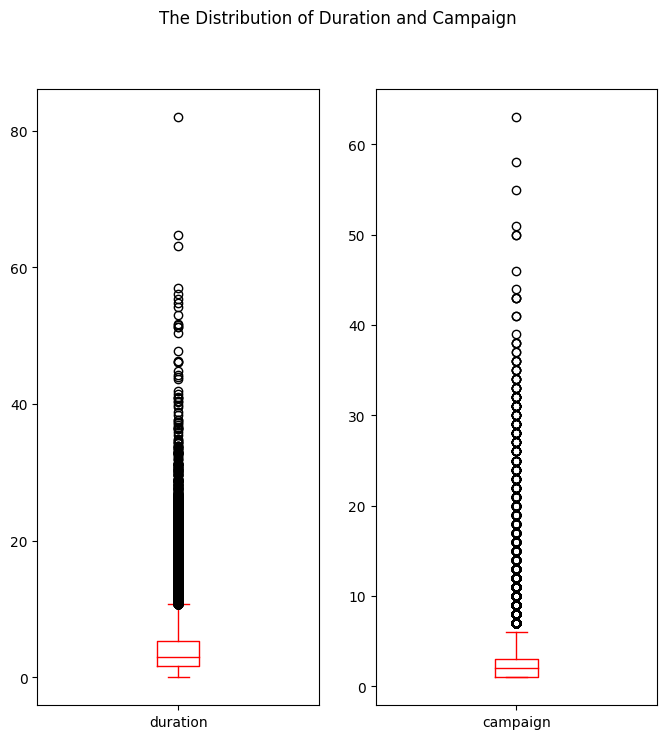

In [32]:
duration_distance_plot = n_df1[['duration','campaign']].plot(kind = 'box', color= 'red',
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

- **Duration**: So, here we can see from the above box plot that most calls are short, with a median duration of 3 minutes. However, there are outliers lasting 10 to 40 minutes, which require further investigation.

- **Campagin**: While many clients were contacted once or twice, a few had up to 58 contacts, indicating special circumstances.

# 2. Relationship between Duration & Campaign

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

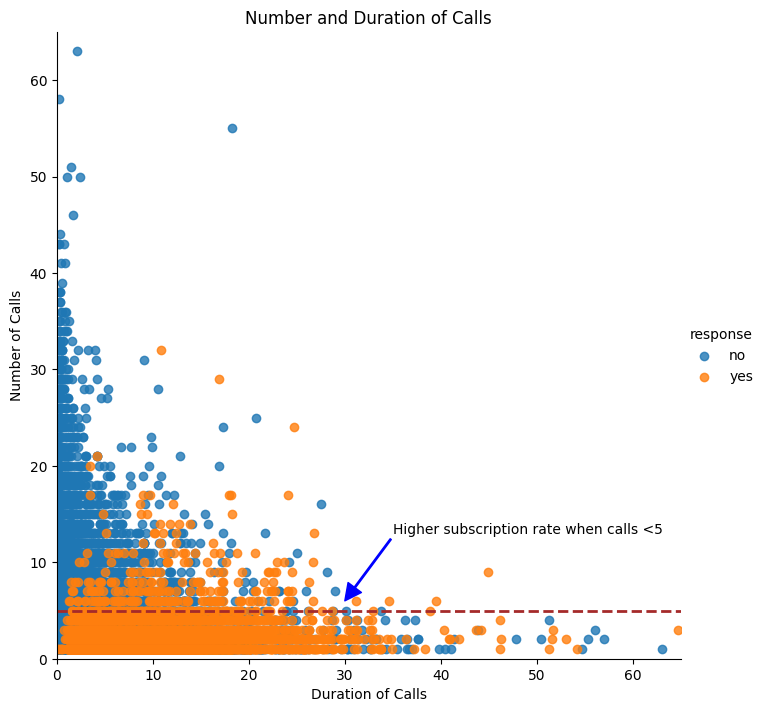

In [33]:
# Create a scatter plot with Seaborn
duration = sns.lmplot(x='duration', y='campaign', data=n_df1,
                     hue='response',
                     fit_reg=False,  # Disable regression line
                     scatter_kws={'alpha': 0.8}, height=7)

# axis limits for better visualization
plt.axis([0, 65, 0, 65])

plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls')

plt.title('Number and Duration of Calls')

# horizontal dashed line at y=5
plt.axhline(y=5, linewidth=2, color="brown", linestyle='--')

# Annotate the plot to highlight a point
plt.annotate('Higher subscription rate when calls <5', xytext=(35, 13),
             arrowprops=dict(color='blue', width=1), xy=(30, 6))

# Show the plot
plt.show()


- In the scatter plot, "yes" clients subscribed to term deposits, while "no" clients did not. The plot shows two distinct clusters: "yes" clients were contacted fewer times and had longer call durations compared to "no" clients. Notably, after five campaign calls, clients are more likely to decline unless the call duration is extended. Most "yes" clients were contacted fewer than 10 times. 

- This implies that the bank should avoid calling a client more than five times, as excessive calls may lead to dissatisfaction.

# 3. Response of target variable

In [34]:
n_df1.response.value_counts(normalize=True)

response
no     0.884998
yes    0.115002
Name: proportion, dtype: float64

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

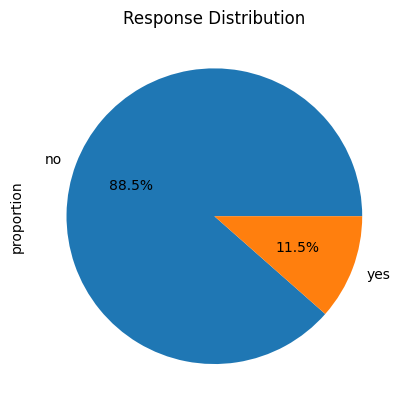

In [35]:
# Count the values and create a pie chart with percentage labels
n_df1['response'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.title('Response Distribution')

plt.show()

- Here we can see that response distribution of Yes is 11.5% and No is 88.5%

# 4. Education 

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

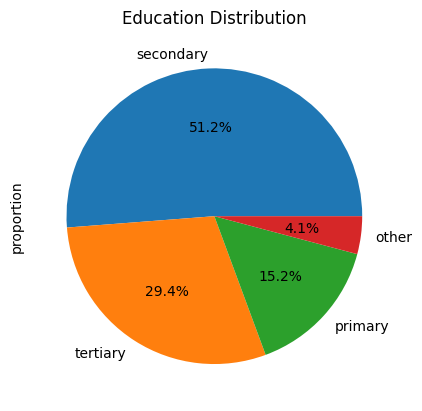

In [36]:
# values and a pie chart with percentage labels
n_df1['education'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.title('Education Distribution')
plt.show()

# 5. Visualization between age, balance and duration

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

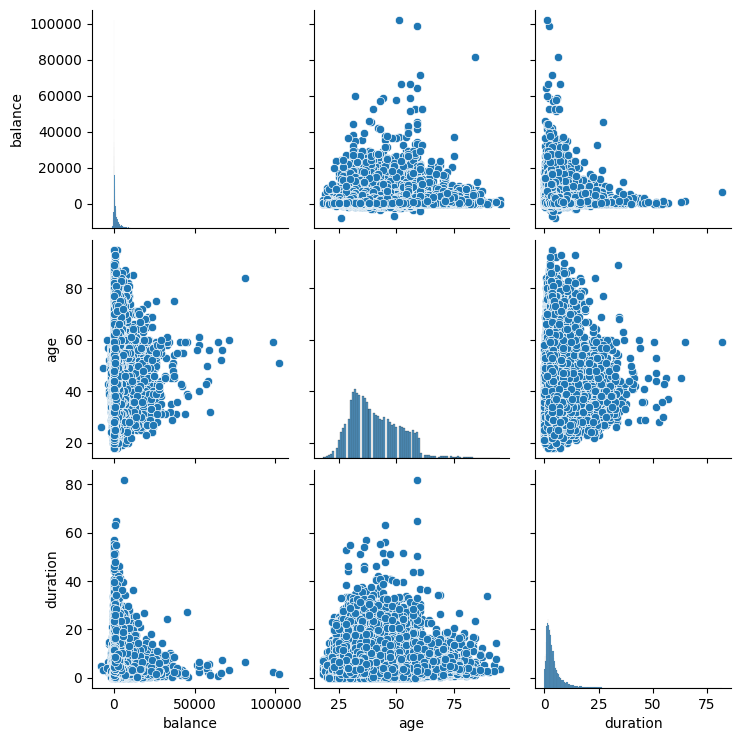

In [37]:
# pairplot with numerical values on the diagonal
pairplot = sns.pairplot(data=n_df1, vars=["balance", "age", "duration"])

for ax in pairplot.axes.flat:
    ax.annotate(ax.get_title(), xy=(0.5, 1.02), xycoords='axes fraction', fontsize=12, ha='center')

plt.show()

- Heatmap for better visualization

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

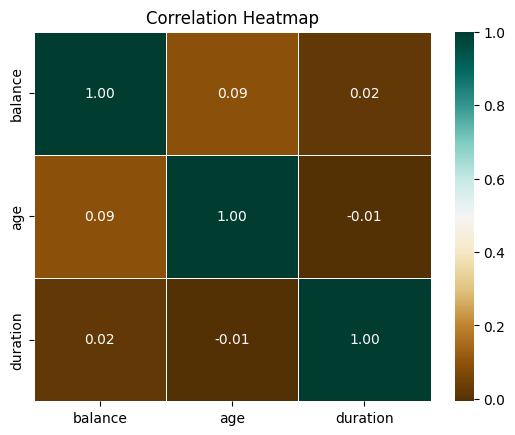

In [38]:
correlation_matrix = n_df1[["balance", "age", "duration"]].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="BrBG", fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

# 6. Marital vs response rate

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

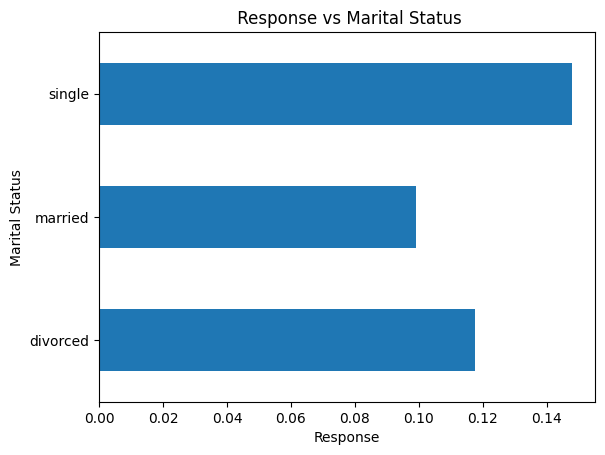

In [39]:
# Convert the binary 'response' column to a numerical format (0 for 'no', 1 for 'yes')
n_df1['response_numeric'] = n_df1['response'].map({'no': 0, 'yes': 1})

marital_response_mean = n_df1.groupby("marital")["response_numeric"].mean()

marital_response_mean.plot(kind='barh')
plt.xlabel('Response')
plt.ylabel('Marital Status')
plt.title(' Response vs Marital Status')
plt.show()


# 7. Education vs poutcome vs response

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

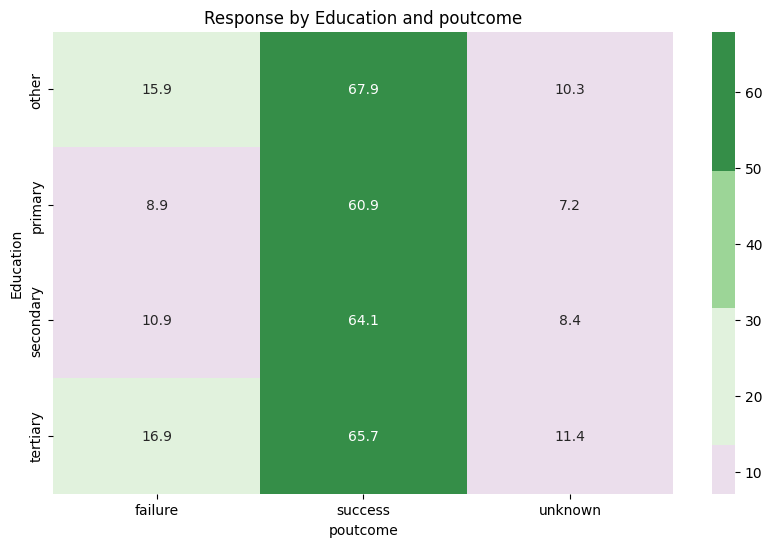

In [40]:
custom_palette = sns.color_palette("PRGn")
#  here we will create a pivot table for response by education and poutcome
res3 = n_df1.pivot_table(index="education", columns="poutcome", values="response_numeric")

# heatmap with percentage values
plt.figure(figsize=(10, 6))
sns.heatmap(res3 * 100, annot=True, fmt=".1f", cmap=custom_palette, center=res3.median().median() * 100)

plt.xlabel('poutcome')
plt.ylabel('Education')
plt.title('Response by Education and poutcome')

plt.show()

# 8. Education vs marital vs response

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

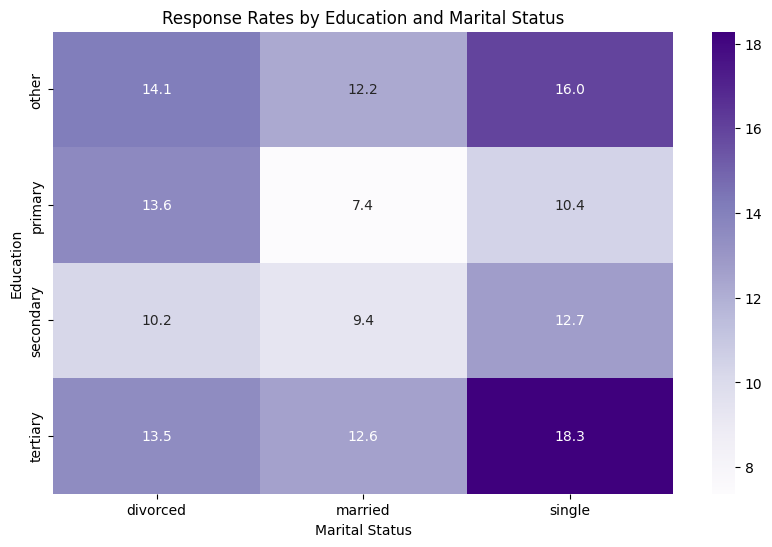

In [41]:
# here we will create a pivot table for response_numeric by education and marital status
res1 = n_df1.pivot_table(index="education", columns="marital", values="response_numeric", aggfunc="mean")
#print(res1.isnull().sum())
#print(res1)
# heatmap with percentage values
plt.figure(figsize=(10, 6))
sns.heatmap(res1 * 100, annot=True, fmt=".1f", cmap="Purples")

plt.xlabel('Marital Status')
plt.ylabel('Education')
plt.title('Response Rates by Education and Marital Status')

plt.show()

# Correlation Matrix

In [42]:
# relevant columns for correlation
#selected_columns = ['age', 'balance', 'duration', 'campaign', 'month', 'previous', 'response']
#corr_data = n_df1[selected_columns]

# correlation matrix
#corr_matrix = corr_data.corr()

#  heatmap with annotations
plt.figure(figsize=(8, 6))
cor_plot = sns.heatmap(corr_matrix, annot=True, cmap='PiYG', linewidths=0.2, annot_kws={'size': 10})

plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Correlation Matrix', fontsize=14)

plt.show()

Above we can see that the correlation matrix does not indicate any significant relationships between age, balance, duration, and campaign variables.

## Step 3. Data Visualization 

### 1.  Subscription and contact rate by age

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

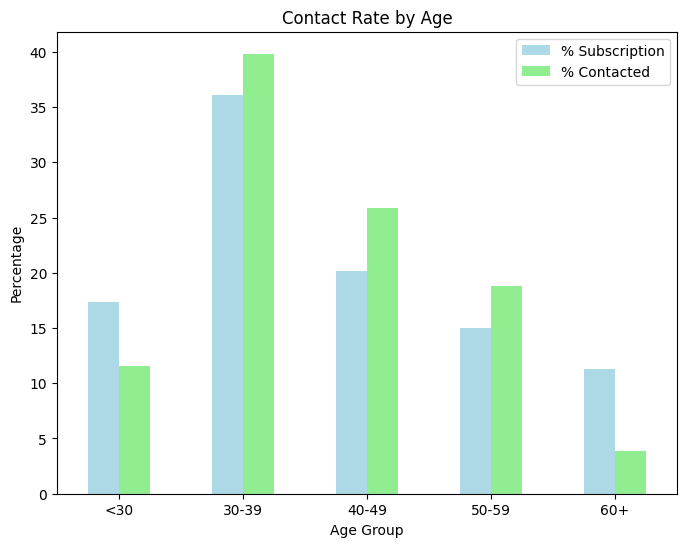

In [43]:
# creating the age groups
age_bins = [0, 29, 39, 49, 59, 100]
age_labels = ['<30', '30-39', '40-49', '50-59', '60+']

# will create a new column age_group based on age bins
n_df1['age_group'] = pd.cut(n_df1['age'], bins=age_bins, labels=age_labels)

# calculate the percentage of subscriptions by age group
subscription_by_age = n_df1[n_df1['response'] == 'yes']['age_group'].value_counts(normalize=True).sort_index() * 100

# calculate the percentage of clients contacted by age group
contacted_by_age = n_df1['age_group'].value_counts(normalize=True).sort_index() * 100

# DataFrame to store the results
age_data = pd.DataFrame({'% Subscription': subscription_by_age, '% Contacted': contacted_by_age})

# now here we will sort the DataFrame by age groups
age_data = age_data.reindex(age_labels)

age_data.plot(kind='bar', figsize=(8, 6), color=('lightblue', 'lightgreen'))
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.title('Contact Rate by Age')
plt.show()

### 2. Subscription by balance level

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

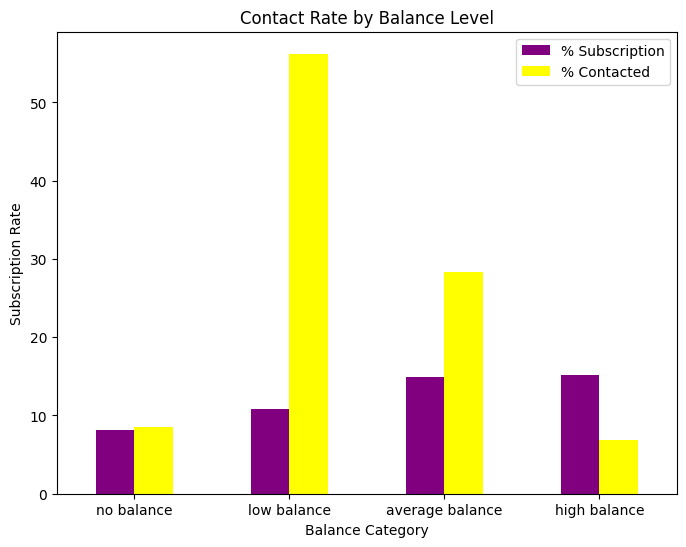

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Create balance groups based on 'balance' column
n_df1['balance_group'] = pd.cut(n_df1['balance'], bins=[-1, 0, 1000, 5000, float('inf')],
                                labels=['no balance', 'low balance', 'average balance', 'high balance'])

# Calculate subscription rate by balance group
subscription_rate = n_df1.groupby('balance_group')['response'].value_counts(normalize=True)[:, 'yes'] * 100

# Calculate the percentage of clients in each balance group
contacted_percentage = n_df1['balance_group'].value_counts(normalize=True) * 100

# Create a DataFrame
balance_df = pd.DataFrame({'% Subscription': subscription_rate, '% Contacted': contacted_percentage})

# Plot the bar chart
balance_df.plot(kind='bar', color=['purple', 'yellow'], figsize=(8, 6))
plt.title('Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation='horizontal')

plt.show()

### 3. Subscription by Job

/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

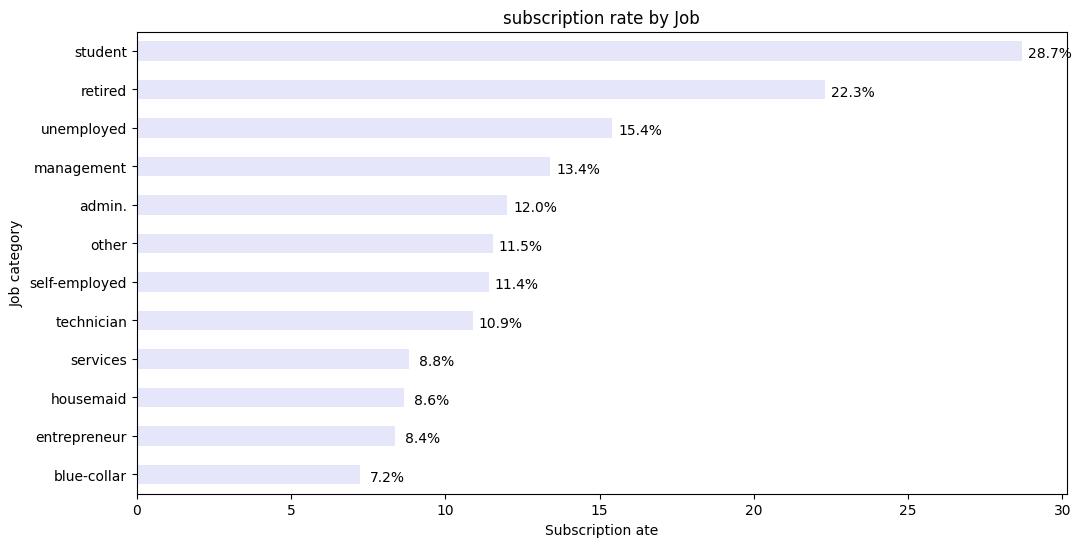

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

#subscription  by job category
subscription_rate = n_df1.groupby('job')['response'].value_counts(normalize=True)[:, 'yes'] * 100

# Sort values in ascending order
subscription_rate = subscription_rate.sort_values(ascending=True)

# Create a bar chart
job_plot = subscription_rate.plot(kind='barh', figsize=(12, 6), color="lavender")

plt.title('subscription rate by Job')
plt.xlabel('Subscription ate')
plt.ylabel('Job category')

# Label each bar
for rect, label in zip(job_plot.patches, subscription_rate.round(1).astype(str)):
    job_plot.text(rect.get_width() + 0.9, rect.get_y() + rect.get_height() - 0.5, label + '%', ha='center', va='bottom')

plt.show()



In [46]:
# Save the DataFrame to a CSV file
file_path = '/Users/himanshutalele/Desktop/Self/Bank_Campaign_Data/output_data.csv'
delimiter = ';'
n_df1.to_csv(file_path, sep=delimiter, index=False)

## Target Variable:
So from above data preprocessing and exploratory data analysis (EDA) tasks on a dataset of bank marketing campaign. 
The "response" variable is likely the target variable for a predictive model. Hence we can use it to build a model that predicts whether a client will subscribe to a term deposit based on the available features. 

## Step 4.  Machine Learning

###### Feature Engineering

In [47]:
data = pd.read_csv('/Users/himanshutalele/Desktop/Self/Bank_Campaign_Data/output_data.csv', delimiter=';')
display(data)
data.info()

age           job   marital  education default  balance housing loan   
0      58.0    management   married   tertiary      no     2143     yes   no  \
1      44.0    technician    single  secondary      no       29     yes   no   
2      33.0  entrepreneur   married  secondary      no        2     yes  yes   
3      47.0   blue-collar   married      other      no     1506     yes   no   
4      33.0         other    single      other      no        1      no   no   
...     ...           ...       ...        ...     ...      ...     ...  ...   
43342  25.0    technician    single  secondary      no      505      no  yes   
43343  51.0    technician   married   tertiary      no      825      no   no   
43344  71.0       retired  divorced    primary      no     1729      no   no   
43345  72.0       retired   married  secondary      no     5715      no   no   
43346  57.0   blue-collar   married  secondary      no      668      no   no   

       day  month  duration  campaign  pdays  previous poutcome response   
0        5      5      4.35         1    NaN         0  unknown       no  \
1        5      5      2.52         1    NaN         0  unknown       no   
2        5      5      1.27         1    NaN         0  unknown       no   
3        5      5      1.53         1    NaN         0  unknown       no   
4        5      5      3.30         1    NaN         0  unknown       no   
...    ...    ...       ...       ...    ...       ...      ...      ...   
43342   17     11      6.43         2    NaN         0  unknown      yes   
43343   17     11     16.28         3    NaN         0  unknown      yes   
43344   17     11      7.60         2    NaN         0  unknown      yes   
43345   17     11     18.78         5  184.0         3  success      yes   
43346   17     11      8.47         4    NaN         0  unknown       no   

       response_numeric age_group    balance_group  
0                     0     50-59  average balance  
1                     0     40-49      low balance  
2                     0     30-39      low balance  
3                     0     40-49  average balance  
4                     0     30-39      low balance  
...                 ...       ...              ...  
43342                 1       <30      low balance  
43343                 1     50-59      low balance  
43344                 1       60+  average balance  
43345                 1       60+     high balance  
43346                 0     50-59      low balance  

[43347 rows x 19 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43347 entries, 0 to 43346
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               43347 non-null  float64
 1   job               43347 non-null  object 
 2   marital           43347 non-null  object 
 3   education         43347 non-null  object 
 4   default           43347 non-null  object 
 5   balance           43347 non-null  int64  
 6   housing           43347 non-null  object 
 7   loan              43347 non-null  object 
 8   day               43347 non-null  int64  
 9   month             43347 non-null  int64  
 10  duration          43347 non-null  float64
 11  campaign          43347 non-null  int64  
 12  pdays             6412 non-null   float64
 13  previous          43347 non-null  int64  
 14  poutcome          43347 non-null  object 
 15  response          43347 non-null  object 
 16  response_numeric  43347 non-null  int64 

In [48]:
data.isnull().sum()

age                     0
job                     0
marital                 0
education               0
default                 0
balance                 0
housing                 0
loan                    0
day                     0
month                   0
duration                0
campaign                0
pdays               36935
previous                0
poutcome                0
response                0
response_numeric        0
age_group               0
balance_group        3636
dtype: int64

##### Now we will classify which variables are related to customer and will proceed with those varibales. Also we will drop few columns which we dont need for further analysis.
##### So in the next step we will figure out the columns names from the cleaned dataset which is 'output_data'.

In [49]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response', 'response_numeric', 'age_group',
       'balance_group'],
      dtype='object')

So the Columns names are : 
-  age
- job
- education
- default
- balance
- housing
- balance
- loan

In [50]:
# columns to keep
columns_to_keep = ['age', 'job', 'education', 'default', 'balance', 'housing', 'loan']

# here we will drop all other columns except the above ones.
df = df[columns_to_keep]
df

age           job  education default  balance housing loan
0      58.0    management   tertiary      no     2143     yes   no
1      44.0    technician  secondary      no       29     yes   no
2      33.0  entrepreneur  secondary      no        2     yes  yes
3      47.0   blue-collar    unknown      no     1506     yes   no
4      33.0       unknown    unknown      no        1      no   no
...     ...           ...        ...     ...      ...     ...  ...
45206  51.0    technician   tertiary      no      825      no   no
45207  71.0       retired    primary      no     1729      no   no
45208  72.0       retired  secondary      no     5715      no   no
45209  57.0   blue-collar  secondary      no      668      no   no
45210  37.0  entrepreneur  secondary      no     2971      no   no

[45211 rows x 7 columns]

Here, out of 7 columns 5 coumns contains categorical values and from those 3 contains binary values. so in the next step before proceeding train-test we will create a new Dataframe and will distribute job and education and also for binary values we will defines numberical values i.e Yes - 1 and for No - 0 

In [51]:
# columns to one-hot encode
columns_to_encode = ['job', 'education']

# Now we will create dummy variables for the specified columns
concat_df = pd.concat([df, pd.get_dummies(df[columns_to_encode])], axis=1)

# Now we will drop the original categorical columns after creating dummy variables
concat_df.drop(columns_to_encode, axis=1, inplace=True)
concat_df

age default  balance housing loan  job_admin.  job_blue-collar   
0      58.0      no     2143     yes   no       False            False  \
1      44.0      no       29     yes   no       False            False   
2      33.0      no        2     yes  yes       False            False   
3      47.0      no     1506     yes   no       False             True   
4      33.0      no        1      no   no       False            False   
...     ...     ...      ...     ...  ...         ...              ...   
45206  51.0      no      825      no   no       False            False   
45207  71.0      no     1729      no   no       False            False   
45208  72.0      no     5715      no   no       False            False   
45209  57.0      no      668      no   no       False             True   
45210  37.0      no     2971      no   no       False            False   

       job_entrepreneur  job_housemaid  job_management  ...   
0                 False          False            True  ...  \
1                 False          False           False  ...   
2                  True          False           False  ...   
3                 False          False           False  ...   
4                 False          False           False  ...   
...                 ...            ...             ...  ...   
45206             False          False           False  ...   
45207             False          False           False  ...   
45208             False          False           False  ...   
45209             False          False           False  ...   
45210              True          False           False  ...   

       job_self-employed  job_services  job_student  job_technician   
0                  False         False        False           False  \
1                  False         False        False            True   
2                  False         False        False           False   
3                  False         False        False           False   
4                  False         False        False           False   
...                  ...           ...          ...             ...   
45206              False         False        False            True   
45207              False         False        False           False   
45208              False         False        False           False   
45209              False         False        False           False   
45210              False         False        False           False   

       job_unemployed  job_unknown  education_primary  education_secondary   
0               False        False              False                False  \
1               False        False              False                 True   
2               False        False              False                 True   
3               False        False              False                False   
4               False         True              False                False   
...               ...          ...                ...                  ...   
45206           False        False              False                False   
45207           False        False               True                False   
45208           False        False              False                 True   
45209           False        False              False                 True   
45210           False        False              False                 True   

       education_tertiary  education_unknown  
0                    True              False  
1                   False              False  
2                   False              False  
3                   False               True  
4                   False               True  
...                   ...                ...  
45206                True              False  
45207               False              False  
45208               False              False  
45209               False              False  
45210               False              False  

[45211 

In [52]:
binary_encoded_columns = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management',
                          'job_technician', 'job_unknown', 'job_retired', 'job_services', 'job_self-employed',
                          'job_unemployed', 'job_student', 'education_primary', 'education_secondary',
                          'education_tertiary', 'education_unknown']

# Convert 'False' and 'True' to 0 and 1 in the specified columns
concat_df[binary_encoded_columns] = concat_df[binary_encoded_columns].astype(int)


In [53]:
# List of columns to convert to binary
binary_columns = ['housing', 'default', 'loan']

# here we map those binary values columns with 1 and 0
concat_df[binary_columns] = concat_df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [54]:
concat_df.shape

(45211, 21)

### Data Preparation for Binary Classification

In this step, we create a clean dataset for binary classification. We start by copying the concatenated data, and then we will map the target variable 'response'- form (original dataset) to binary values within the DataFrame. The target variable 'response' will be assigned 1 if 'response' is 'yes', and 0 if 'response' is 'no'. This encoding is necessary for training binary classification models.

In [55]:
print(data['response'].unique())

['no' 'yes']


In [56]:
data['response'] = data['response'].str.strip()

In [57]:
response_df = pd.DataFrame(data['response'])
response_df = response_df['response'].map({'yes': 1, 'no': 0})
binary_classification_DF = pd.merge(concat_df, response_df, left_index=True, right_index=True)

In [58]:
binary_classification_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43347 entries, 0 to 43346
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43326 non-null  float64
 1   default              43347 non-null  int64  
 2   balance              43347 non-null  int64  
 3   housing              43347 non-null  int64  
 4   loan                 43347 non-null  int64  
 5   job_admin.           43347 non-null  int64  
 6   job_blue-collar      43347 non-null  int64  
 7   job_entrepreneur     43347 non-null  int64  
 8   job_housemaid        43347 non-null  int64  
 9   job_management       43347 non-null  int64  
 10  job_retired          43347 non-null  int64  
 11  job_self-employed    43347 non-null  int64  
 12  job_services         43347 non-null  int64  
 13  job_student          43347 non-null  int64  
 14  job_technician       43347 non-null  int64  
 15  job_unemployed       43347 non-null  int6

###### Feature Selection

Now in the feature selection we will be splitting binary_classification_DF  into features (X) and the target variable (Y). Which will extracts all columns except the last one for the feature matrix X and extracts the last column for the target variable Y.

In [59]:
binary_classification_DF = binary_classification_DF[-binary_classification_DF.age.isnull()].copy()
binary_classification_DF
#binary_classification_DF.isnull().sum()

age  default  balance  housing  loan  job_admin.  job_blue-collar   
0      58.0        0     2143        1     0           0                0  \
1      44.0        0       29        1     0           0                0   
2      33.0        0        2        1     1           0                0   
3      47.0        0     1506        1     0           0                1   
4      33.0        0        1        0     0           0                0   
...     ...      ...      ...      ...   ...         ...              ...   
43342  27.0        0     6791        0     0           0                0   
43343  72.0        0     4657        0     0           0                0   
43344  42.0        0        0        1     1           0                0   
43345  29.0        0     3290        0     0           0                0   
43346  29.0        0      655        0     0           0                0   

       job_entrepreneur  job_housemaid  job_management  ...  job_services   
0                     0              0               1  ...             0  \
1                     0              0               0  ...             0   
2                     1              0               0  ...             0   
3                     0              0               0  ...             0   
4                     0              0               0  ...             0   
...                 ...            ...             ...  ...           ...   
43342                 0              0               1  ...             0   
43343                 0              0               0  ...             0   
43344                 0              0               0  ...             0   
43345                 0              0               0  ...             0   
43346                 0              0               0  ...             0   

       job_student  job_technician  job_unemployed  job_unknown   
0                0               0               0            0  \
1                0               1               0            0   
2                0               0               0            0   
3                0               0               0            0   
4                0               0               0            1   
...            ...             ...             ...          ...   
43342            0               0               0            0   
43343            0               0               0            0   
43344            0               0               1            0   
43345            0               0               0            0   
43346            0               0               0            0   

       education_primary  education_secondary  education_tertiary   
0                      0                    0                   1  \
1                      0                    1                   0   
2                      0                    1                   0   
3                      0                    0                   0   
4                      0                    0                   0   
...                  ...                  ...                 ...   
43342                  0                    0                   1   
43343                  1                    0                   0   
43344                  0                    1                   0   
43345                  0                    0                   1   
43346                  0                    0                   1   

       education_unknown  response  
0                      0         0  
1                      0         0  
2                      0         0  
3                      1         0  
4                      1         0  
...                  ...       ...  
43342                  0         1  
43343                  0         1  
43344                  0         1  
43345                  0         1  
43346                  0         0  

[43326 rows x 22 columns]

In [60]:
array = binary_classification_DF.values
X = array[:,0:-1] # except last column
Y = array[:,-1]

In [61]:
# split the data into training (70) and testing (30) set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y)
#binary_classification_DF

In [62]:
# Create a DataFrame with new data
new_data = pd.DataFrame({
    'age': [65],
    'default': [1],
    'balance': [29999],
    'housing': [0],
    'loan': [1],
    'job_admin.': [0],
    'job_blue-collar': [1],
    'job_entrepreneur': [0],
    'job_housemaid': [0],
    'job_management': [0],
    'job_retired': [0],
    'job_self-employed': [0],
    'job_services': [0],
    'job_student': [0],
    'job_technician': [0],
    'job_unemployed': [0],
    'job_unknown': [0],
    'education_primary': [1],
    'education_secondary': [0],
    'education_tertiary': [0],
    'education_unknown': [0]
})

     Metric   Results
0  Accuracy  0.885059


/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

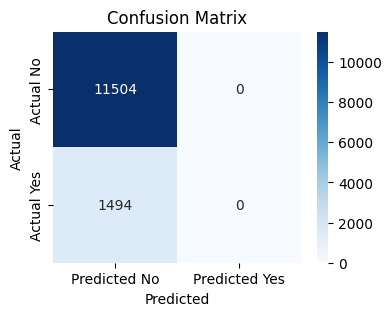

In [63]:
# will train the logistic regression model
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)

# predictions on the test set
y_pred = logistic_regression.predict(X_test)

# evaluation results
accuracy_logistic_regression = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

results_df = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Results": [accuracy_logistic_regression]
})

# results
print(results_df)

# confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#predicted_result = logistic_regression.predict(new_data)
#predicted_result = ["yes" if val == 1 else "no" for val in predicted_result]

#print("\nResponce:", predicted_result[0])

def predict_response(age, default, balance, housing, loan, job, education):
    new_data = pd.DataFrame({
    'age': [age],
    'default': [default], 
    'balance': [balance],
    'housing': [housing],
    'loan': [loan],
    'job_admin.':[job],
    'job_blue-collar': [job],
    'job_entrepreneur':[job] ,
    'job_housemaid': [job],
    'job_management': [job],
    'job_retired': [job],
    'job_self-employed': [job],
    'job_services': [job],
    'job_student': [job],
    'job_technician': [job],
    'job_unemployed': [job],
    'job_unknown': [job],
    'education_primary': [education],
    'education_secondary': [education],
    'education_tertiary': [education],
    'education_unknown': [education] 
    })

    # Make predictions using the logistic regression model
    predicted_result = logistic_regression.predict(new_data)
    return "yes" if predicted_result[0] == 1 else "no"

     Metric     Value
0  Accuracy  0.837052


/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

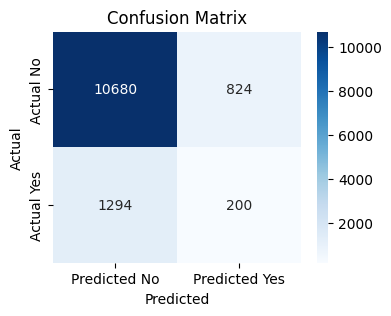


Responce: yes


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [64]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# predictions on the test set
y_pred = naive_bayes.predict(X_test)

# evaluation results
accuracy_naive_bayes = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Value": [accuracy_naive_bayes]
})

print(metrics_df)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

predicted_result = naive_bayes.predict(new_data)
predicted_result = ["yes" if val == 1 else "no" for val in predicted_result]

print("\nResponce:", predicted_result[0])

     Metric   Results
0  Accuracy  0.880366


/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

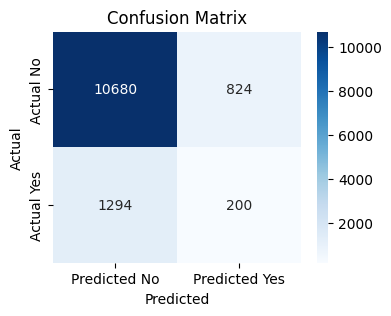


Responce: no


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [65]:
# will train the KNeighborsClassifier model
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)

# predictions on the test set
y_pred = KNN.predict(X_test)

# evaluation results
accuracy_KNN = accuracy_score(y_test, y_pred)

results_df = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Results": [accuracy_KNN]
})
print(results_df)

# confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

predicted_result = KNN.predict(new_data)
predicted_result = ["yes" if val == 1 else "no" for val in predicted_result]

print("\nResponce:", predicted_result[0])

     Metric     Value
0  Accuracy  0.851593


/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

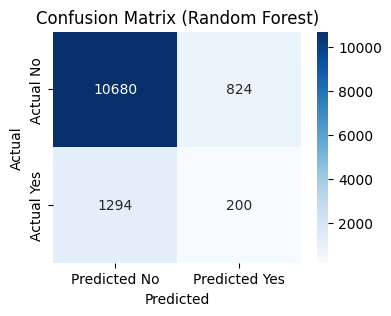


Responce: no


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [66]:
# will train the RandomForestClassifier model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# evaluation results
accuracy_rf = accuracy_score(y_test, y_pred_rf)


metrics_df = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Value": [accuracy_rf]
})

print(metrics_df)

# confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

predicted_result = KNN.predict(new_data)
predicted_result = ["yes" if val == 1 else "no" for val in predicted_result]

print("\nResponce:", predicted_result[0])

     Metric     Value
0  Accuracy  0.801585


/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

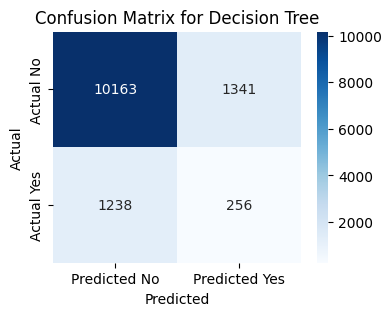


Responce: yes


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [67]:
# will train the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# predictions on the test set
y_pred_tree = decision_tree.predict(X_test)

# evaluation results
accuracy_tree = accuracy_score(y_test, y_pred_tree)

conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Value": [accuracy_tree]
})

print(metrics_df)

# confusion matrix 
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

predicted_result = decision_tree.predict(new_data)
predicted_result = ["yes" if val == 1 else "no" for val in predicted_result]

print("\nResponce:", predicted_result[0])

[LightGBM] [Info] Number of positive: 3486, number of negative: 26842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 30328, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.114943 -> initscore=-2.041213
[LightGBM] [Info] Start training from score -2.041213
     Metric     Value
0  Accuracy  0.883905


/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/himanshutalele/Library/Python/3.11/lib/python/sit

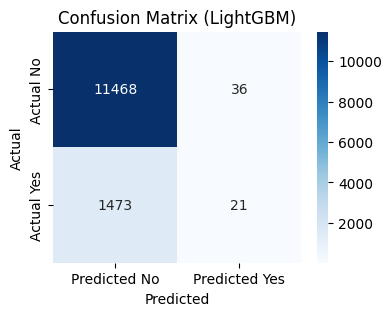


Responce: no


In [68]:
# Create and train the LightGBM model
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Calculate evaluation metrics for LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)


# Create a confusion matrix for LightGBM
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Value": [accuracy_lgb]
})

print(metrics_df)

# Display the confusion matrix for LightGBM
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (LightGBM)")
plt.show()

predicted_result = lgb_model.predict(new_data)
predicted_result = ["yes" if val == 1 else "no" for val in predicted_result]

print("\nResponce:", predicted_result[0])